In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Image data generator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    subset='validation')

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

# Save the model
model.save('emotion_detector_model.h5')


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


C:\Users\knigh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


C:\Users\knigh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 214s 575ms/step - accuracy: 0.2392 - loss: 2.4124 - val_accuracy: 0.3177 - val_loss: 2.0506
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 44s 121ms/step - accuracy: 0.3964 - loss: 1.6191 - val_accuracy: 0.4686 - val_loss: 1.4046
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - accuracy: 0.4630 - loss: 1.4171 - val_accuracy: 0.4910 - val_loss: 1.3170
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - accuracy: 0.4993 - loss: 1.3272 - val_accuracy: 0.5024 - val_loss: 1.3073
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - accuracy: 0.5074 - loss: 1.2863 - val_accuracy: 0.5125 - val_loss: 1.2709
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - accuracy: 0.5229 - loss: 1.2478 - val_accuracy: 0.5321 - val_loss: 1.2396
Epoch 7/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 42s 115ms/step - accuracy: 0.5460 - loss: 1.1904 - val_accuracy: 0.5100 - val_loss: 1.2985
Epoch 8/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 44s 123ms/step - accuracy: 0.5688 - loss: 1.1453 - va

In [17]:
!pip uninstall -y opencv-python-headless
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/38.8 MB 465.5 kB/s eta 0:01:24
   ---------------------------------------- 0.1/38.8 MB 581.0 kB/s eta 0:01:07
   ---------------------------------------- 0.1/38.8 MB 654.9 kB/s eta 0:01:00
   ---------------------------------------- 0.2/38.8 MB 737.3 kB/s eta 0:00:53
   ---------------------------------------- 0.3/38.8 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.4/38.8 MB 1.0 MB/s eta 0:00:39
    --------------------------------------- 0.6/38.8 MB 1.4 MB/s eta 0:00:28
    --------------------------------------- 0.7/38.8 MB 1.6 MB/s eta 0:00:24
   - -------------------------------------- 1.0/38.8 MB 2.1 MB/s eta 0:00:19
   - -------

In [25]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
from IPython.display import display

# Load the trained model
model = load_model('emotion_detector_model.h5')

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Initialize the face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_and_predict_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+w, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray.astype('float32') / 255
        roi_gray = np.expand_dims(roi_gray, axis=0)
        roi_gray = np.expand_dims(roi_gray, axis=-1)
        
        prediction = model.predict(roi_gray)
        max_index = np.argmax(prediction[0])
        emotion = emotion_labels[max_index]
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        
    return frame

# Use webcam to capture video
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    frame = detect_and_predict_emotion(frame)
    
    # Convert BGR to RGB for Pillow
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(frame_rgb)
    
    display(img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()


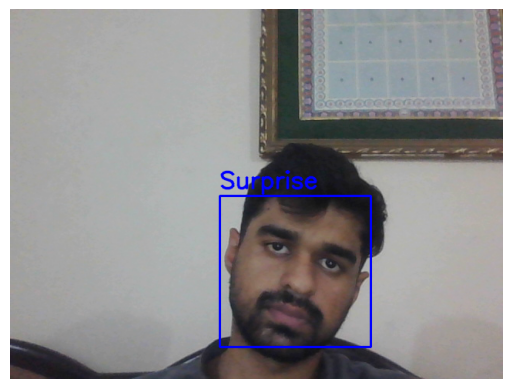

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from IPython.display import clear_output

# Load the trained model
model = load_model('emotion_detector_model.h5')

# Compile the model to avoid the warning
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Initialize the face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_and_predict_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+w, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray.astype('float32') / 255
        roi_gray = np.expand_dims(roi_gray, axis=0)
        roi_gray = np.expand_dims(roi_gray, axis=-1)
        
        prediction = model.predict(roi_gray)
        max_index = np.argmax(prediction[0])
        emotion = emotion_labels[max_index]
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        
    return frame

# Use webcam to capture video
cap = cv2.VideoCapture(0)

ret, frame = cap.read()
if ret:
    frame = detect_and_predict_emotion(frame)
    
    # Convert BGR to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Display the frame
    plt.imshow(frame_rgb)
    plt.axis('off')
    clear_output(wait=True)
    plt.show()

# Release the capture and close any OpenCV windows
cap.release()
plt.close()


Number of samples: 28709
Class distribution: Counter({'Happy': 7215, 'Neutral': 4965, 'Sad': 4830, 'Fear': 4097, 'Angry': 3995, 'Surprise': 3171, 'Disgust': 436})
Average image shape: [48. 48.  1.]
Minimum image shape: [48 48  1]
Maximum image shape: [48 48  1]


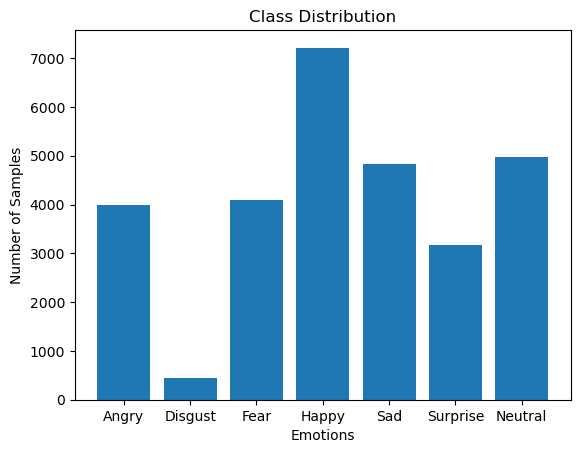

In [63]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Directory containing the dataset
dataset_dir = r'C:\Users\knigh\Documents\train'  # Use raw string

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Initialize counters and statistics
num_samples = 0
class_counts = Counter()
image_shapes = []

# Loop through each emotion directory
for emotion in emotion_labels:
    emotion_dir = os.path.join(dataset_dir, emotion)
    if not os.path.isdir(emotion_dir):
        continue
    # Loop through each image in the emotion directory
    for img_name in os.listdir(emotion_dir):
        img_path = os.path.join(emotion_dir, img_name)
        try:
            # Load image
            img = load_img(img_path, color_mode='grayscale')
            img_array = img_to_array(img)
            
            # Update counters and statistics
            num_samples += 1
            class_counts[emotion] += 1
            image_shapes.append(img_array.shape)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

# Calculate image size statistics if there are valid images
if image_shapes:
    image_shapes = np.array(image_shapes)
    avg_shape = np.mean(image_shapes, axis=0)
    min_shape = np.min(image_shapes, axis=0)
    max_shape = np.max(image_shapes, axis=0)

    # Print statistics
    print(f"Number of samples: {num_samples}")
    print(f"Class distribution: {class_counts}")
    print(f"Average image shape: {avg_shape}")
    print(f"Minimum image shape: {min_shape}")
    print(f"Maximum image shape: {max_shape}")
else:
    print("No valid images found in the dataset.")

# Plot class distribution if there are valid images
if class_counts:
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Emotions')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution')
    plt.show()
else:
    print("No classes found in the dataset.")
